## Video Game Sales

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
# step 1 - load the csv file
df = pd.read_csv("vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [25]:
# get the info of the dataset
df.info()

#shape of the dataset
print("Shape of the dataframe: ", df.shape)

#calculate number of rows
print("Number of rows: ",df.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
Shape of the dataframe:  (16598, 11)
Number of rows:  16598


In [26]:
#find missing data in colums
print(df.columns)

for i in df.columns:
    num_rows = df[f"{i}"].count()
    
    if(num_rows != df.shape[0]):
        print(f"Column {i} has {df.shape[0] - num_rows }missing  values")

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')
Column Year has 271missing  values
Column Publisher has 58missing  values


In [28]:
#smatter way to handle missing values
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
# drop rows with missing values, since we still need years to get the trends well
df=df.dropna()

df.shape



(16291, 11)

In [47]:
# rank by global sales, 

df.head(10)
# print(df.head(10))

top_10 = df.sort_values(by="Global_Sales",ascending=False).head(10)
print(top_10)

   Rank                       Name Platform    Year         Genre Publisher  \
0     1                 Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2          Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3             Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4          Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5   Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   
5     6                     Tetris       GB  1989.0        Puzzle  Nintendo   
6     7      New Super Mario Bros.       DS  2006.0      Platform  Nintendo   
7     8                   Wii Play      Wii  2006.0          Misc  Nintendo   
8     9  New Super Mario Bros. Wii      Wii  2009.0      Platform  Nintendo   
9    10                  Duck Hunt      NES  1984.0       Shooter  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29

In [68]:

#publishr that has the most games in top 100
top_100= df.sort_values(by="Global_Sales",ascending=False).head(100)
#top_publisher = (top_100.groupby('Publisher')['Global_Sales'].mean()*100).round(2)
publisher_counts = top_100['Publisher'].value_counts()
print(publisher_counts)

Publisher
Nintendo                       52
Activision                     14
Take-Two Interactive            9
Sony Computer Entertainment     8
Microsoft Game Studios          6
Electronic Arts                 5
Ubisoft                         2
Bethesda Softworks              1
Sega                            1
SquareSoft                      1
Atari                           1
Name: count, dtype: int64


## Platform wars

In [63]:
# Platform with highest TOTAL sales
platform_sales = df.groupby('Platform')['Global_Sales'].sum()

# Sort it
platform_sales_sorted = platform_sales.sort_values(ascending=False)

print(platform_sales_sorted.head(10))  # Top 10 platforms

Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.91
PS       727.39
GBA      305.62
PSP      291.71
PS4      278.10
PC       254.70
Name: Global_Sales, dtype: float64


In [ ]:
#which publisher dominates the top 100 by game count
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


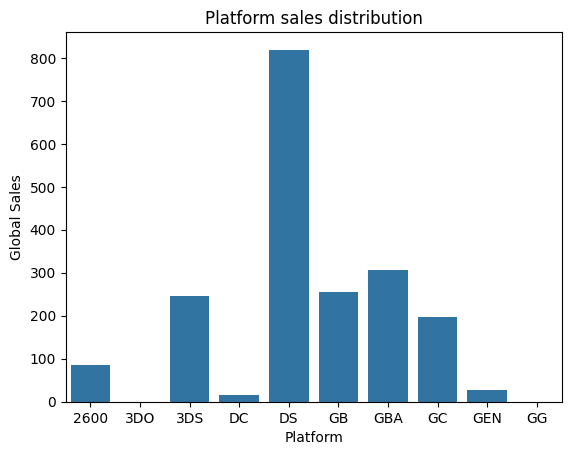

In [73]:
# Bar chart
sns.barplot(x="Platform",y="Global_Sales",data=platform_sales.head(10).to_frame())
plt.title("Platform sales distribution")
plt.ylabel("Global Sales")
plt.show()